# DATA_EXPLORATION

The purpose of this notebook is just to visualize all data from dataset. Operations from data won't be done. First of all, we are going to see target variable and then all descriptors. We'll explain more or less what each descriptor means.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

import sys
sys.path.append('../')
from utils import *

In [2]:
# read data
data = pd.read_csv('../data/US_Accidents_March23_sampled_500k.csv')

In [3]:
# see columns
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [4]:
# see each type of variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

Even though the purpose of this notebook is just to visualize data, we'll do some operations to see if there are missing values in dataset, but just to see if there are missing values, we won't do any operation to fill them.

In [5]:
missing_values = data.isnull().sum()
print(missing_values)

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  220377
End_Lng                  220377
Distance(mi)                  0
Description                   1
Street                      691
City                         19
County                        0
State                         0
Zipcode                     116
Country                       0
Timezone                    507
Airport_Code               1446
Weather_Timestamp          7674
Temperature(F)            10466
Wind_Chill(F)            129017
Humidity(%)               11130
Pressure(in)               8928
Visibility(mi)            11291
Wind_Direction            11197
Wind_Speed(mph)           36987
Precipitation(in)        142616
Weather_Condition         11101
Amenity                       0
Bump                          0
Crossing

Except from Weather_Timestamp and Precipitacion, all descriptors don't have so many missing values. This is a good point for us, however, we are going to ignore this fact to visualize data, it's a good point to know this information.

### Target vairable

Text(0, 0.5, 'Frequency')

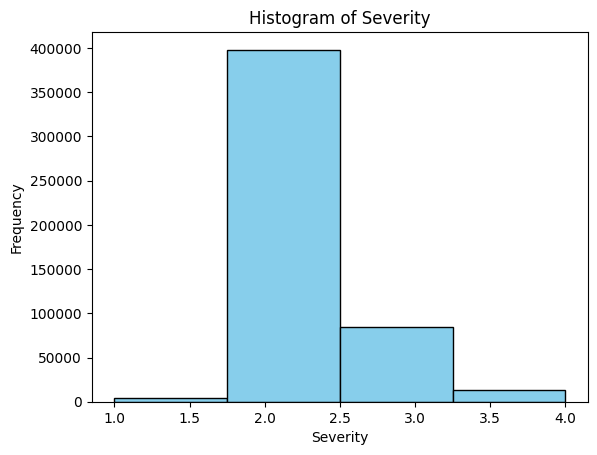

In [6]:
data['Severity'].plot(kind='hist', bins = 4, color = 'skyblue', edgecolor = 'black')

plt.title('Histogram of Severity')
plt.xlabel('Severity')
plt.ylabel('Frequency')

As we can see, it seems this variable seems unbalanced. We have more accidents with severity 2 than 1, 3 and 4. This is important to take into account when we are going to train a model. Better to check the f1-score than accuracy, for instance.

### Location variables

We notice we have several variables that are useless due to the vast amount of differents objects that there are. We remember that location variables are: 'Street', 'County', 'State', 'Zipcode', 'Country', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Airport_Code', 'Timezone'.

In general, if we just have variables 'Start_Lat' and 'Start_Lng' we can locate the accident and we don't really need other kind of variables, since we would be giving information extra to the model.

We should also take into account that there are variables that are useless because there are a lot of different values. For instance, 'Street' variable. Another example is the variable 'Country'. We have only one value, so it's useless. Other variables just don't give extra informat

In [7]:
location_variables = ['Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Airport_Code', 'Timezone']

First of all, we are going to visualize all points from latitude and longitude. Notice it should be a map with form of USA. 

As we can see in the graph below, the accidents are more concentrated in the east coast of USA. This is important to take into account when we are going to train a model. Maybe we should take into account this variable.

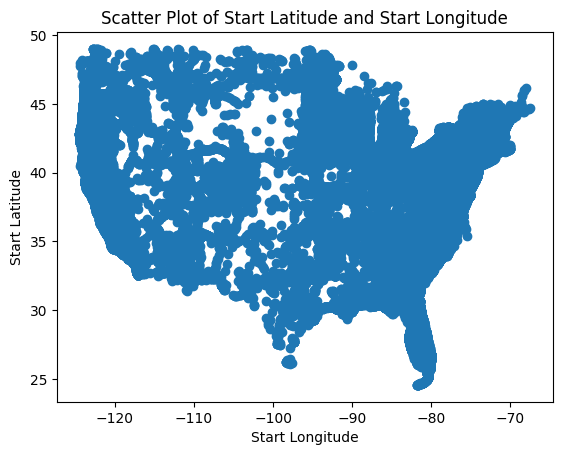

In [8]:
plt.scatter(data['Start_Lng'], data['Start_Lat'])
plt.xlabel('Start Longitude')
plt.ylabel('Start Latitude')
plt.title('Scatter Plot of Start Latitude and Start Longitude')
plt.show()

Now, let's see the distribution of the variables 'City'. Since there are a lot of different values, we are going to see the top 10 cities with more accidents.

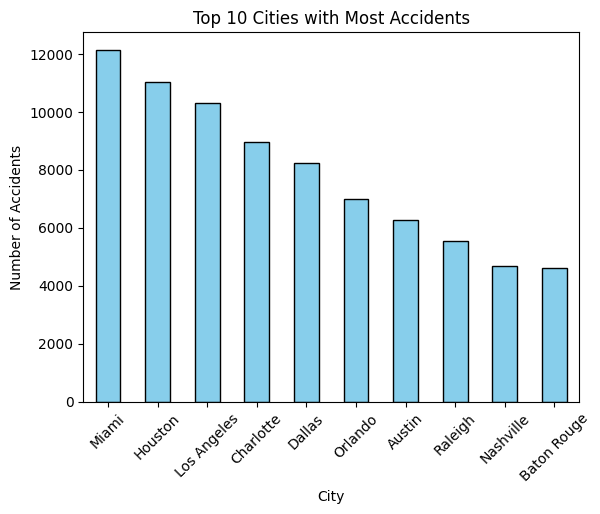

In [9]:
top_10_cities = data['City'].value_counts().nlargest(10)
top_10_cities.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 10 Cities with Most Accidents')
plt.xlabel('City')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

Now, we are going to do the same but with the variable 'State'. We are going to see the top 10 states with more accidents.

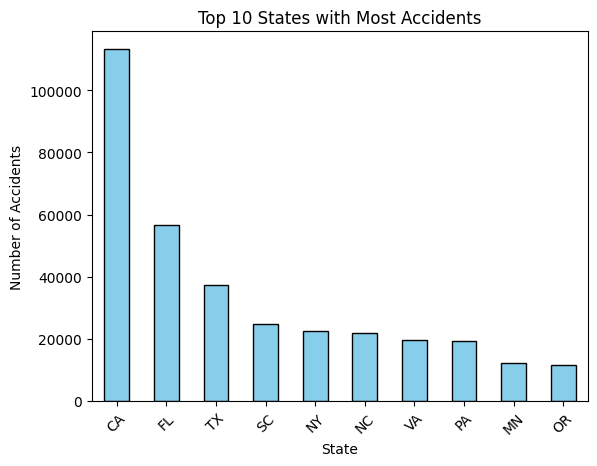

In [10]:
top_10_states = data['State'].value_counts().nlargest(10)
top_10_states.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 10 States with Most Accidents')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

As we can see, there are many variables from states California. This is important to take into account when we take conclusions, since we have more accidents in California than in other states, so bias can be introduced.

Now, let's do the same with the variable 'County'. We are going to see the top 10 counties with more accidents. As it can be seen, below, Los Angeles is the county with more accidents, agreeing with the previous plot.

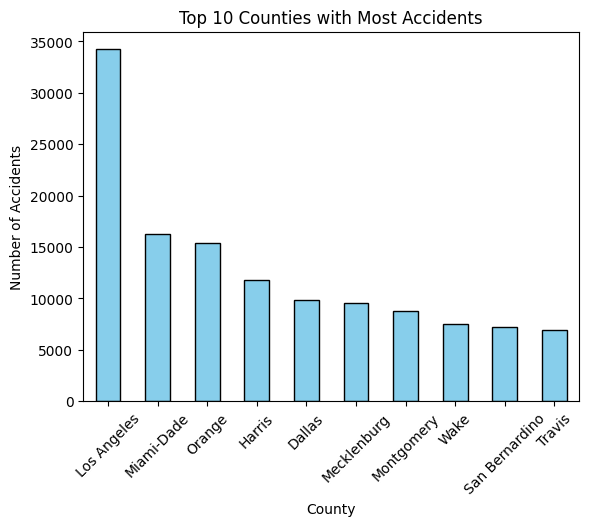

In [11]:
top_10_counties = data['County'].value_counts().nlargest(10)
top_10_counties.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 10 Counties with Most Accidents')
plt.xlabel('County')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

Another variable to take into account is 'Airport_Code', since the author explained, some of the data is collected from airports. We are going to see the top 10 airport codes with more accidents.

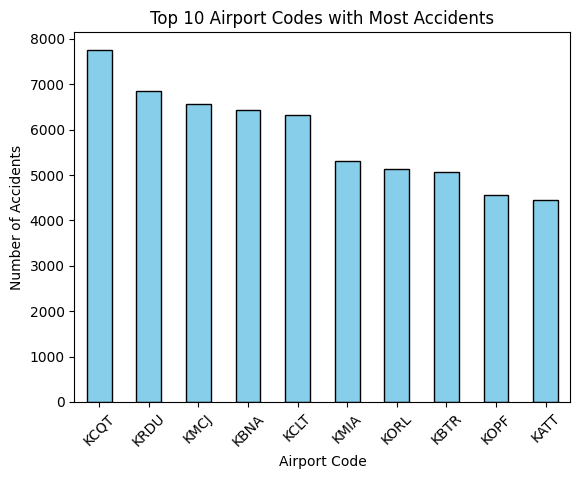

In [12]:
top_10_airport_codes = data['Airport_Code'].value_counts().nlargest(10)
top_10_airport_codes.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 10 Airport Codes with Most Accidents')
plt.xlabel('Airport Code')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

Here, we don't see unbalanced data. Howevef, as before, we can check out that the most common airports are: KCQT(Los Angeles), KRDU(North Carolina) and KMCJ(Texas)

Since 'Timezone' and 'Timezone' are variable that are highly correlated to 'State', we are not going to see it. So, we can conclude this section with the results shown.

### Time variables

In this dataset, we have variables Start_Time, End_Time and Weather_Timestamp. We are going to see the distribution of the variable 'Start_Time' and 'End_Time', neglecting the variable 'Weather_Timestamp' since we don't consider it is important.

In [13]:
time_variables = ['Start_Time', 'End_Time', 'Weather_Timestamp']

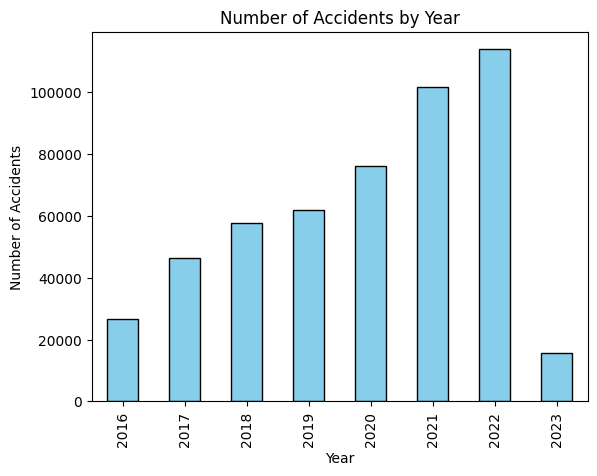

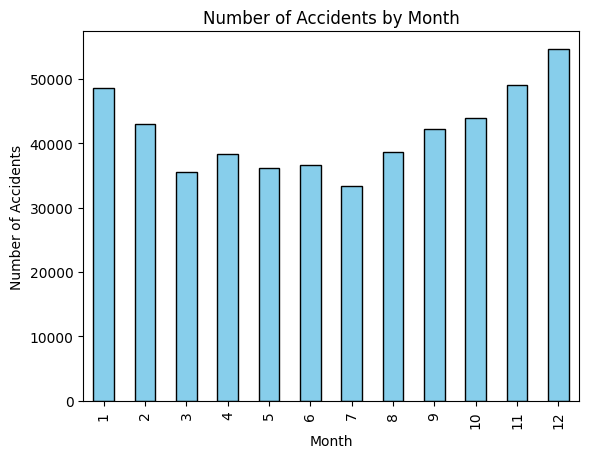

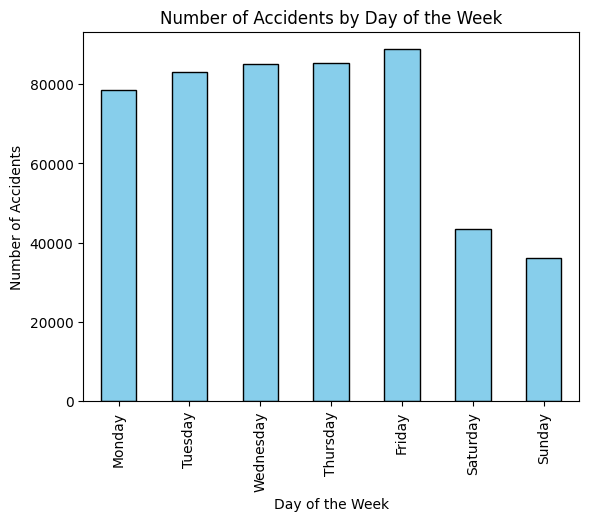

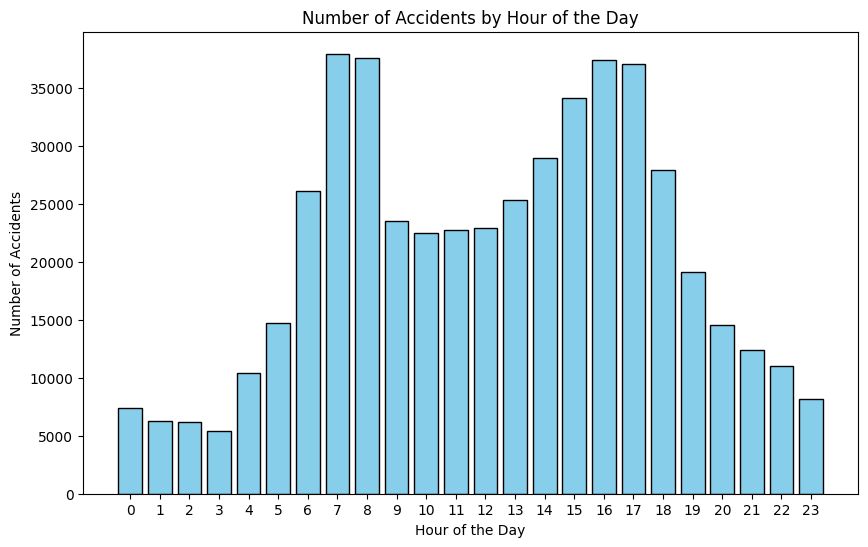

In [14]:
years: list[int] = list()
months: list[int] = list()
hours: list[int] = list()
weekdays: list[int] = list()

for start_time in data['Start_Time']:

    years.append(int(start_time[:4]))
    months.append(int(start_time[5:7]))
    hours.append(int(start_time[11:13]))

    start_time_p = start_time.split('.')[0]
    weekdays.append(datetime.strptime(start_time_p, '%Y-%m-%d %H:%M:%S').weekday())

data['Year'] = pd.DataFrame(years)
data['Month'] = pd.DataFrame(months)
data['Weekday'] = pd.DataFrame(weekdays)
data['Hour'] = pd.DataFrame(hours)

accidents_by_year = data['Year'].value_counts().sort_index()
accidents_by_year.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

accidents_by_month = data.groupby('Month')['Year'].count()
accidents_by_month.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

day_of_week_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
accidents_by_day_of_week = data['Weekday'].value_counts().sort_index()
accidents_by_day_of_week.index = day_of_week_labels
accidents_by_day_of_week.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()


accidents_by_hour = data['Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(accidents_by_hour.index, accidents_by_hour.values, color='skyblue', edgecolor='black')

plt.title('Number of Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(24))
plt.show()


As we can see, the distribution of the variable 'Start_Time' is uniform. This is important to take into account when we are going to train a model. We should take into account that we have more accidents in the morning and in the afternoon, for instance. It's iimportant to see how there are less accidents in the weekends, since people don't work and there are less cars in the road. 

Moreover, all this information seems to be coherent with the variable 'Sunrise_Sunset', that we are going to see later. 

To sum up, time variables should be considered important to describe target variable and they are coherent enough to be taken into account when we are going to train a model.

### Traffic variables

Now, we are going to see the behavior of variables 'ID', 'Source', 'Description' and 'Distance'. As before, there are variables that are useless, take for instance 'ID' and 'Description'. Source is defined as the provider of the data as the data owner explained. We are going to see the sources with more accidents.

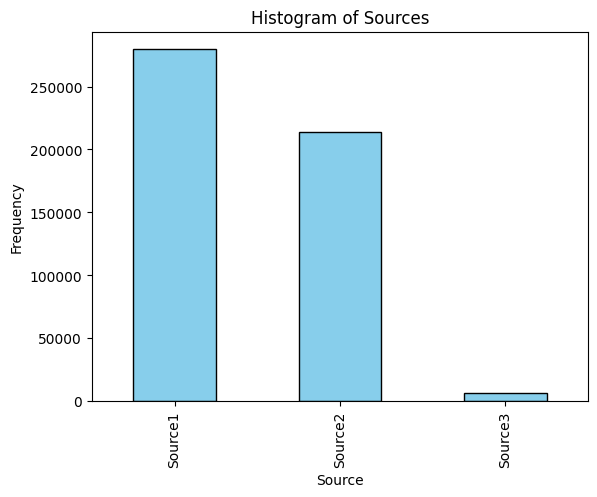

In [15]:
data['Source'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Histogram of Sources')
plt.xlabel('Source')
plt.ylabel('Frequency')
plt.show()

As we can see, there are three sources, with Source1 and Source2 being the most common. This sources are explained in paper.

What's next is to see the variable 'Distance'. Distance is defined as the length of the road extent affected by the accident in miles. We are going to see the distribution of this variable. As below, it seems there are a lot of outliers. We should take into account this when we are going to train a model.

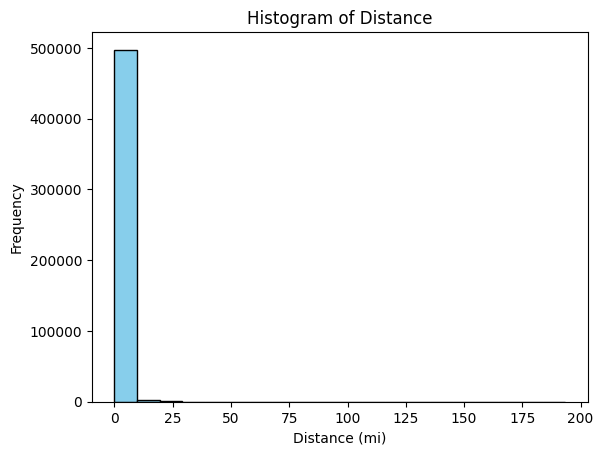

In [16]:
data['Distance(mi)'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')

plt.title('Histogram of Distance')
plt.xlabel('Distance (mi)')
plt.ylabel('Frequency')
plt.show()

### Weather variables

Now, we are going to see the behavior of variables 'Temperature', 'Wind_Chill', 'Humidity', 'Pressure', 'Visibility', 'Wind_Direction', 'Wind_Speed', 'Precipitation' and 'Weather_Condition'.

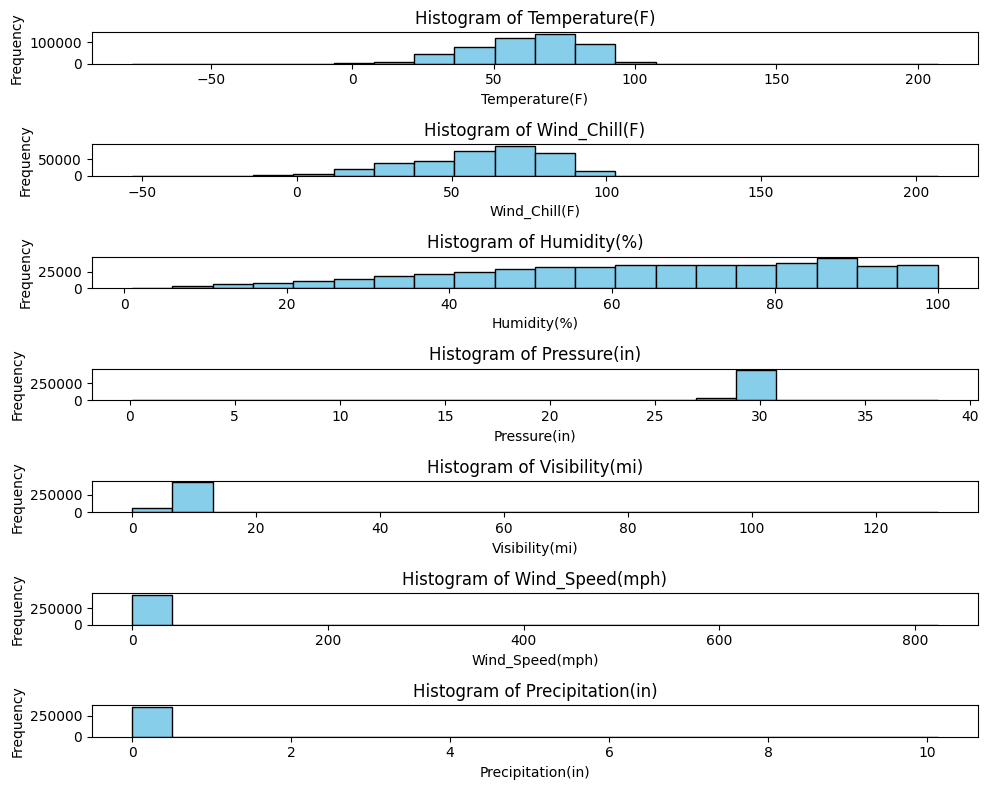

In [17]:
weather_variables = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

fig, axs = plt.subplots(len(weather_variables), 1, figsize=(10, 8))

for i, var in enumerate(weather_variables):
    axs[i].hist(data[var].dropna(), bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Histogram of {var}')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()

plt.show()


As we can see, all weather variables are numerical variables that we'll have to deal with. 'Weather_Condition' and 'Wind_Direction' are categorical variables that we'll have to deal with. We are going to see the distribution of this variable.


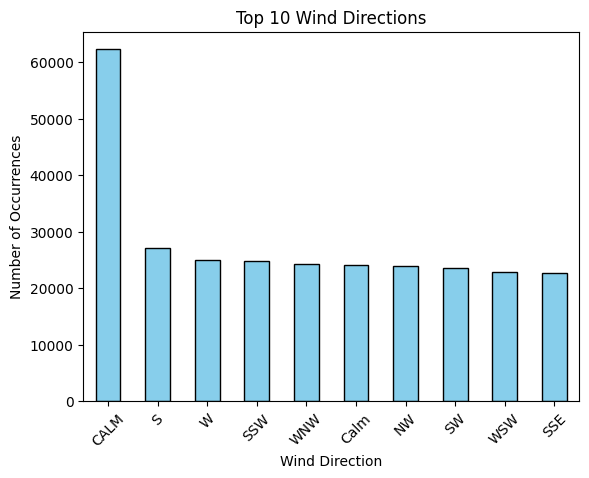

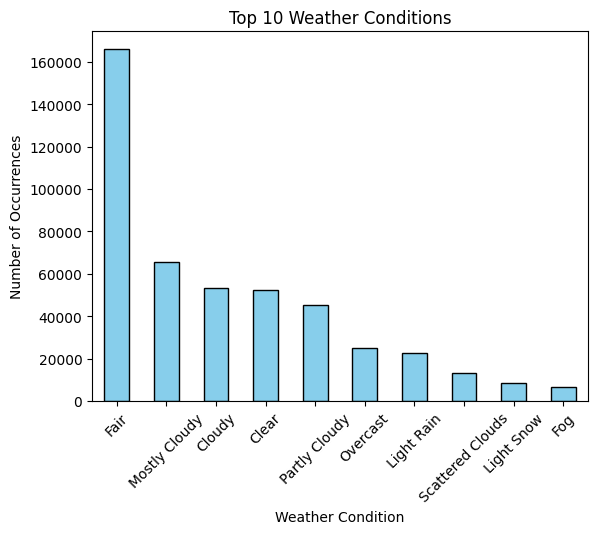

In [18]:
top_10_wind_directions = data['Wind_Direction'].value_counts().nlargest(10)
top_10_wind_directions.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 10 Wind Directions')
plt.xlabel('Wind Direction')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()

top_10_weather_conditions = data['Weather_Condition'].value_counts().nlargest(10)
top_10_weather_conditions.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 10 Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()

NOtice that the vast majority of accidents are with clear weather. This is important to take into account when we are going to train a model. Despite this information, it is important to highlight that it's highly probable that we are not gonna use these two variables, but this problem doesn't belong to this notebook.

### Road variables

Notice all road variables are booleans. For this reason we are going to plot a pie chart to see the proportion of each variable. There are no nans in this variables.

In [19]:
road_variables = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

data[road_variables].isna().sum()

Amenity            0
Bump               0
Crossing           0
Give_Way           0
Junction           0
No_Exit            0
Railway            0
Roundabout         0
Station            0
Stop               0
Traffic_Calming    0
Traffic_Signal     0
Turning_Loop       0
dtype: int64

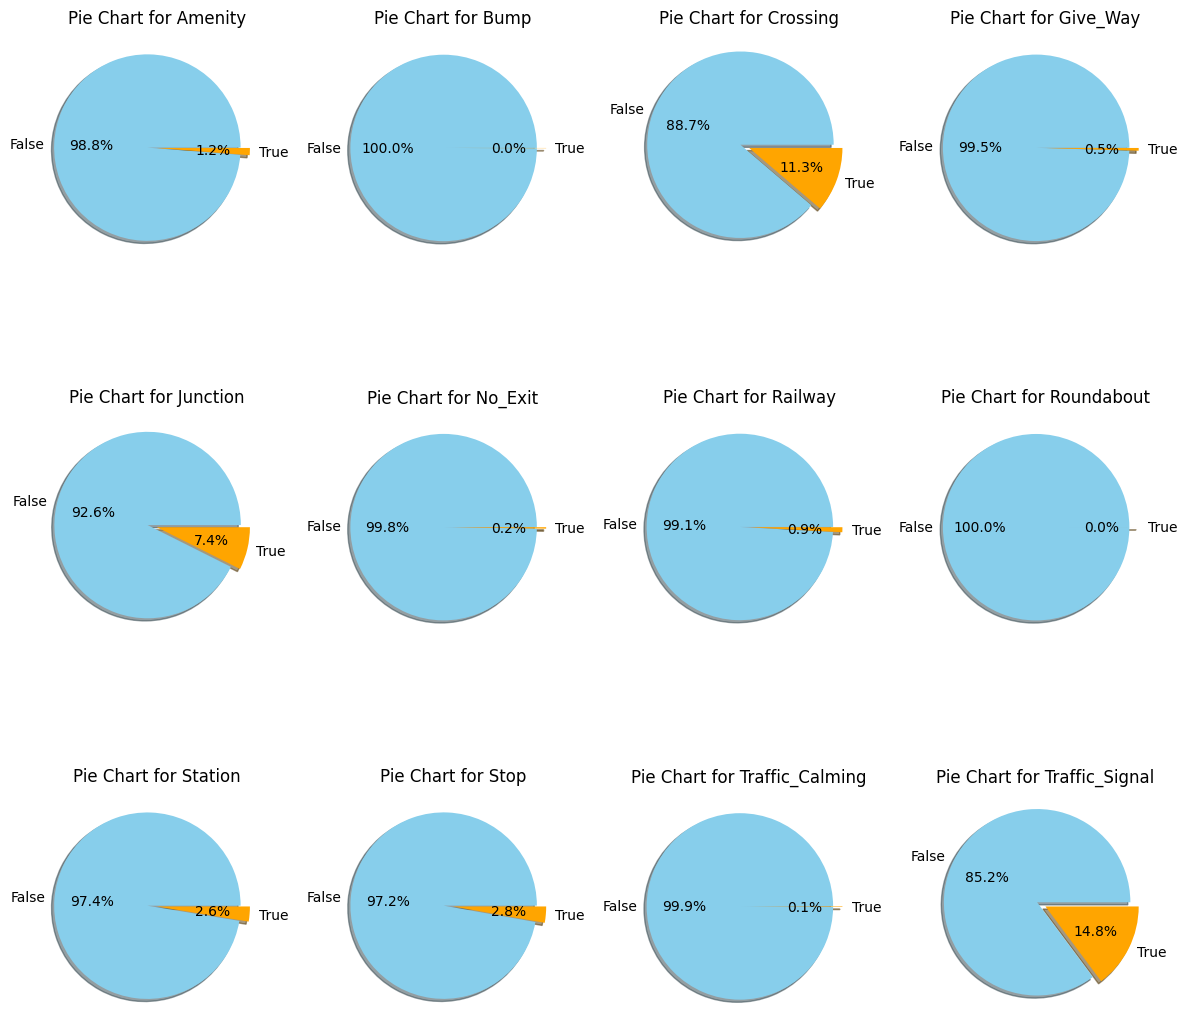

In [20]:
road_variables = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']

fig, axs = plt.subplots(3, 4, figsize=(12, 12))

for i, var in enumerate(road_variables):
    row = i // 4
    col = i % 4
    axs[row, col].pie(data[var].value_counts(), labels=data[var].value_counts().index, autopct='%1.1f%%', colors=['skyblue', 'orange'], explode=(0.1, 0), shadow=True)
    axs[row, col].set_title(f'Pie Chart for {var}')

plt.tight_layout()
plt.show()
    

As we can see, in vast majority of cases, the road variables are False. 

### Period of day variables

As we can see, the vast majority of accidents happen during the day. This is important to take into account when we are going to train a model. Maybe we should take into account this variable.

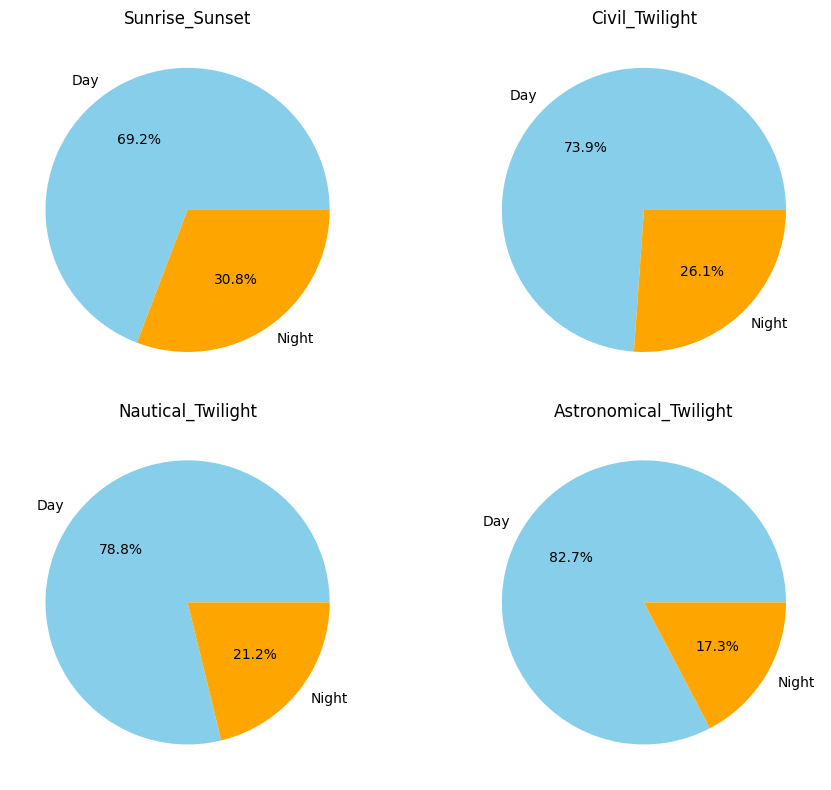

In [21]:
period_of_day_variables = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].pie(data['Sunrise_Sunset'].value_counts(), labels=data['Sunrise_Sunset'].value_counts().index, autopct='%1.1f%%', colors=['skyblue', 'orange'])
axs[0, 0].set_title('Sunrise_Sunset')

axs[0, 1].pie(data['Civil_Twilight'].value_counts(), labels=data['Civil_Twilight'].value_counts().index, autopct='%1.1f%%', colors=['skyblue', 'orange'])
axs[0, 1].set_title('Civil_Twilight')

axs[1, 0].pie(data['Nautical_Twilight'].value_counts(), labels=data['Nautical_Twilight'].value_counts().index, autopct='%1.1f%%', colors=['skyblue', 'orange'])
axs[1, 0].set_title('Nautical_Twilight')

axs[1, 1].pie(data['Astronomical_Twilight'].value_counts(), labels=data['Astronomical_Twilight'].value_counts().index, autopct='%1.1f%%', colors=['skyblue', 'orange'])
axs[1, 1].set_title('Astronomical_Twilight')

plt.tight_layout()
plt.show()